In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
train = pd.read_csv('Training.csv')
test = pd.read_csv('Testing.csv')

In [20]:
train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [21]:
test.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [22]:
train.shape

(4920, 133)

In [23]:
test.shape

(42, 133)

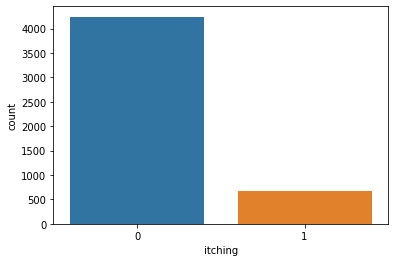

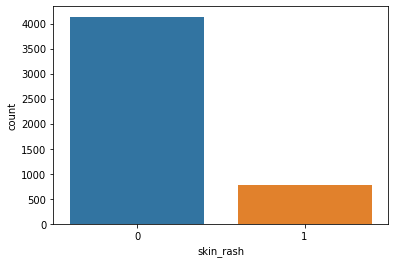

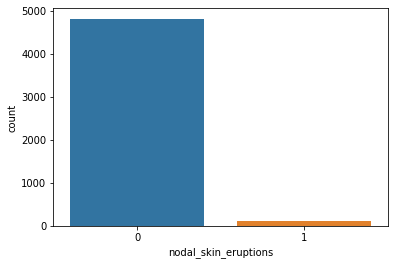

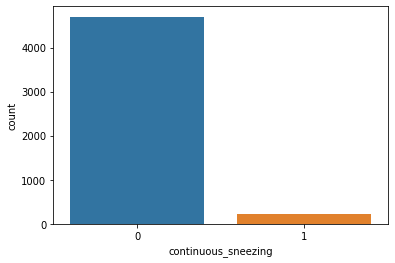

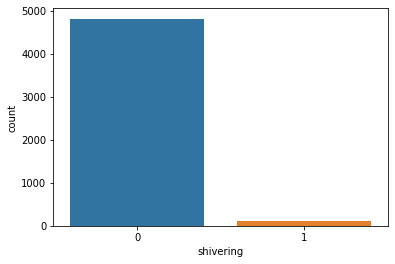

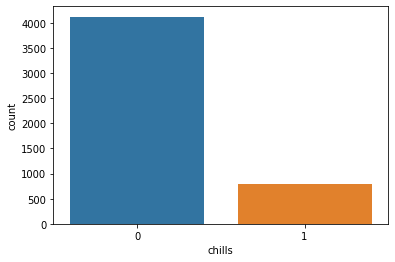

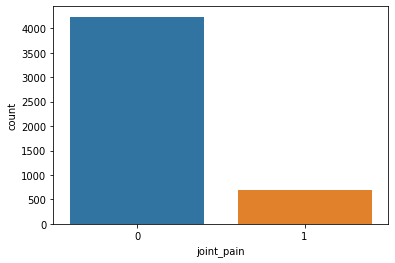

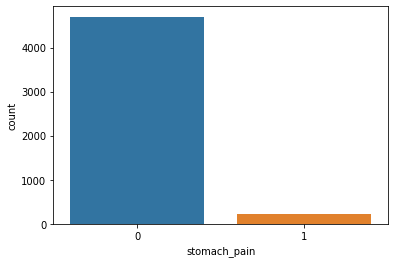

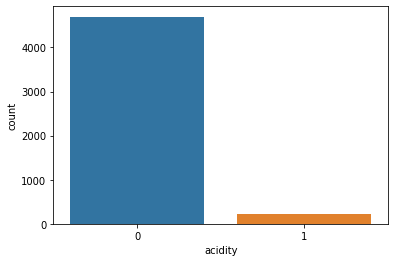

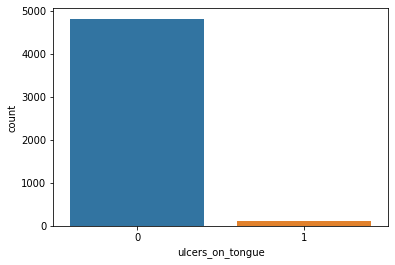

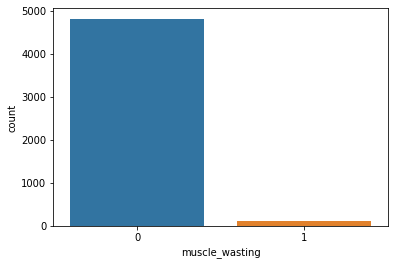

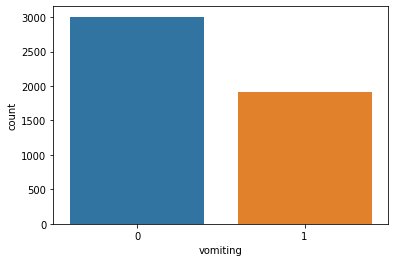

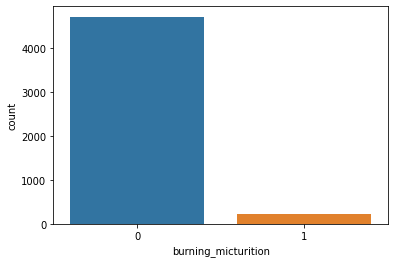

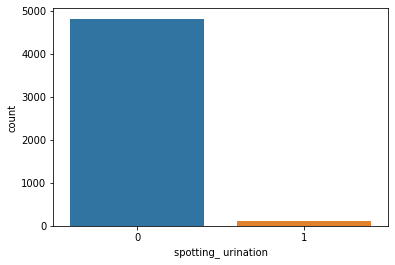

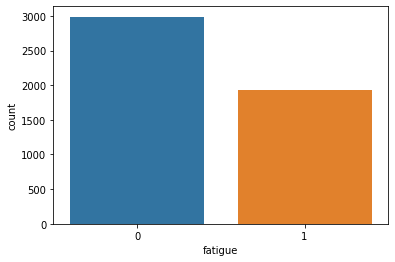

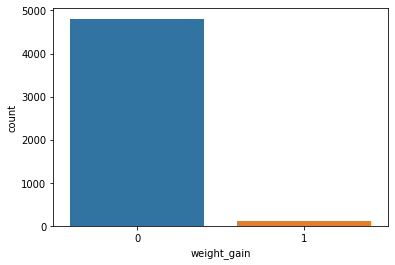

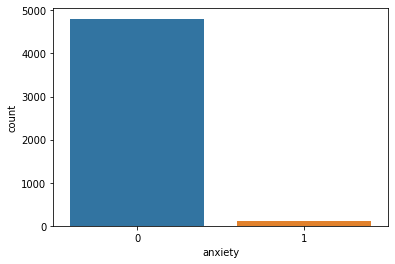

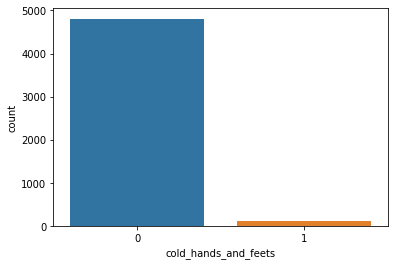

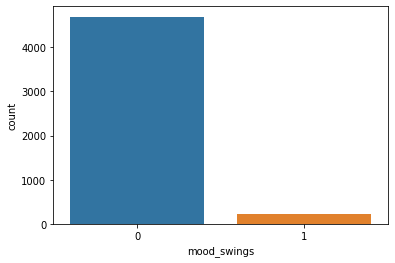

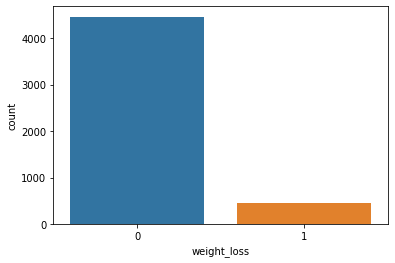

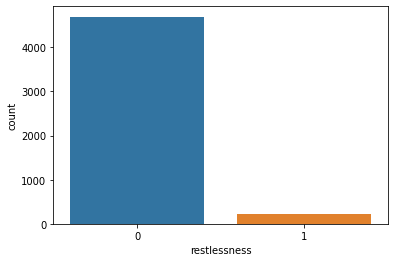

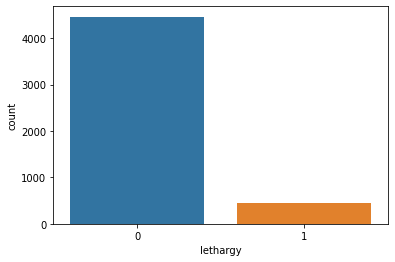

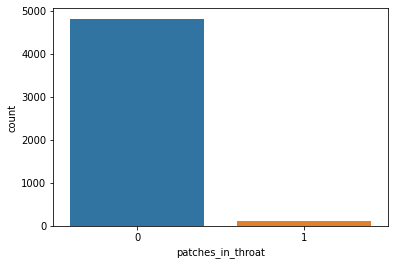

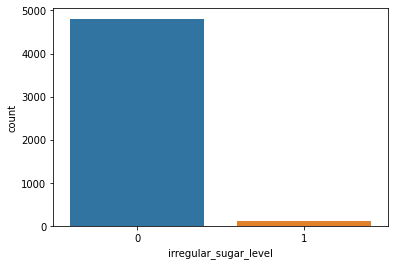

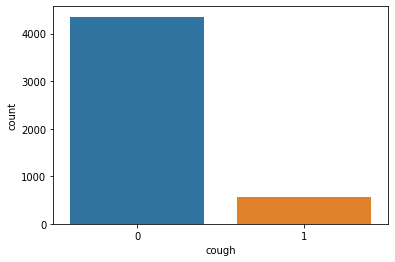

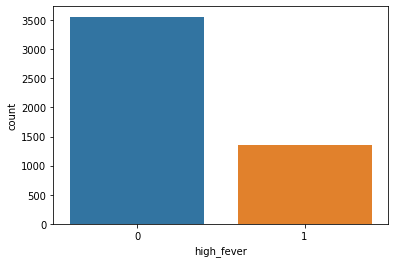

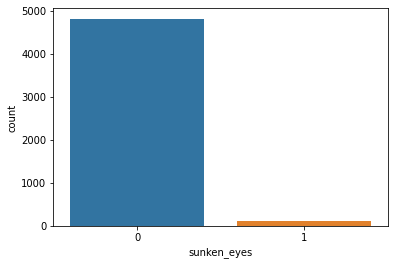

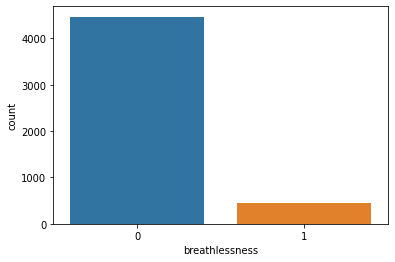

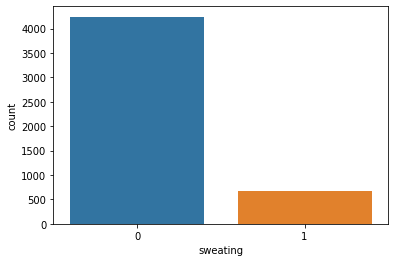

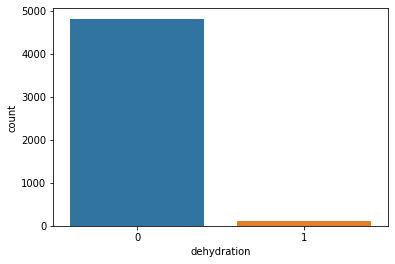

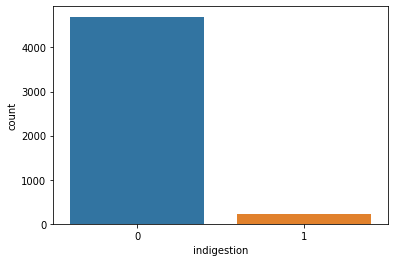

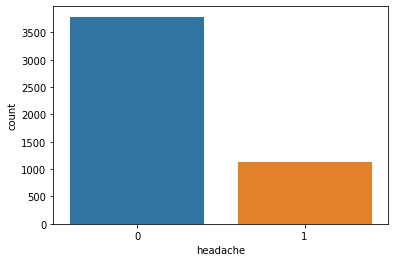

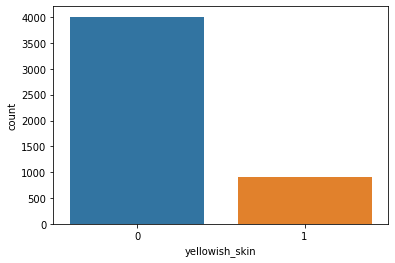

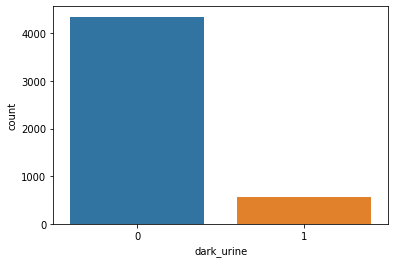

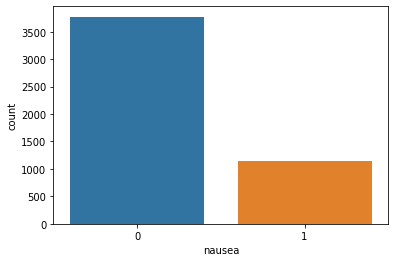

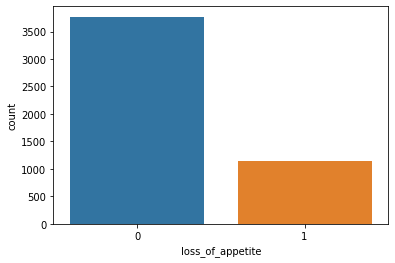

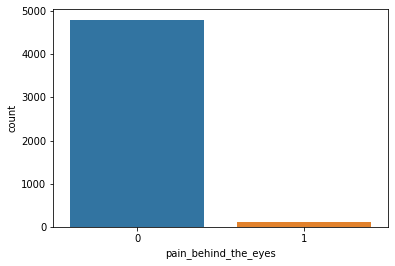

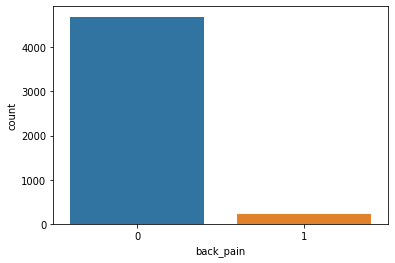

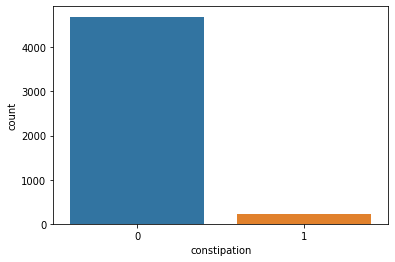

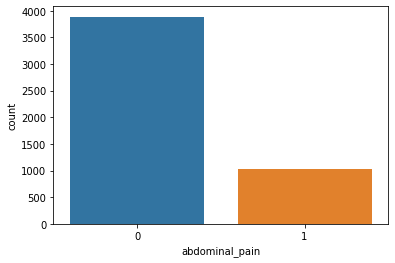

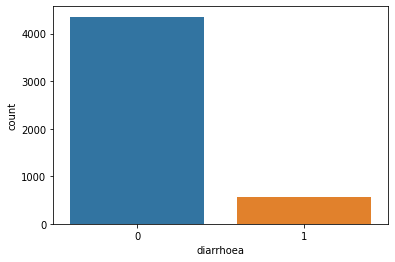

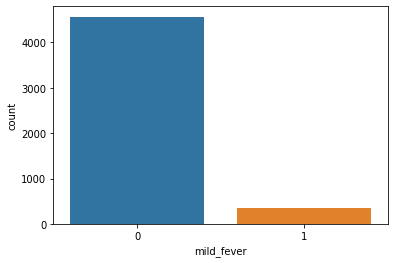

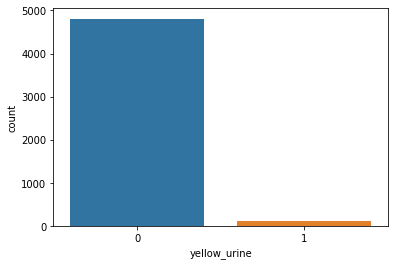

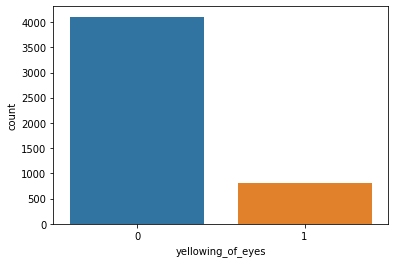

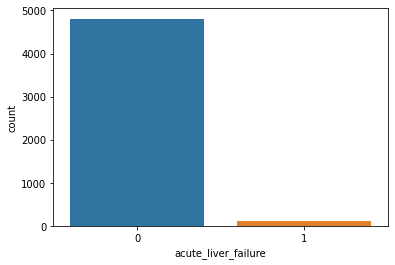

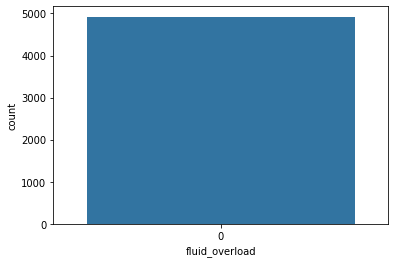

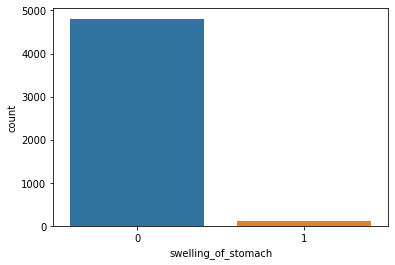

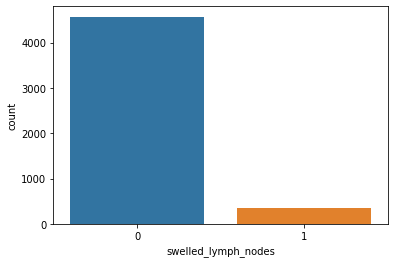

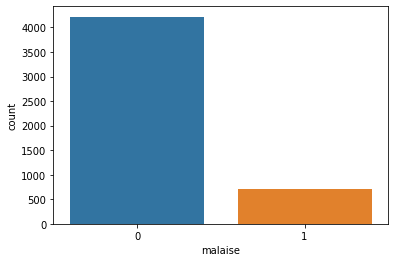

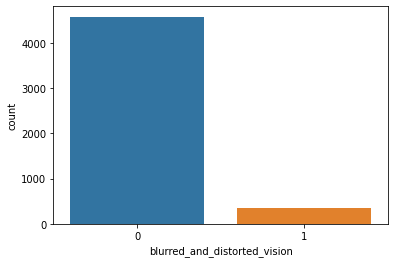

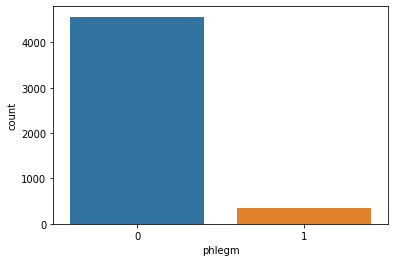

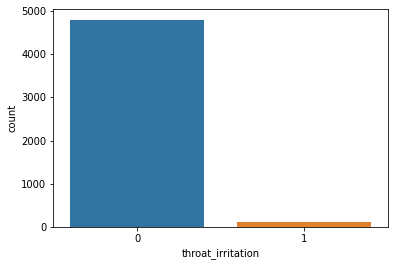

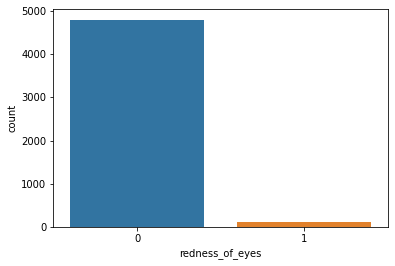

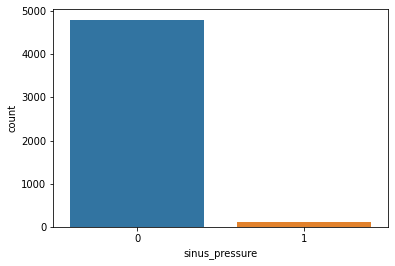

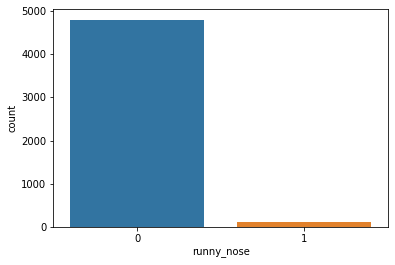

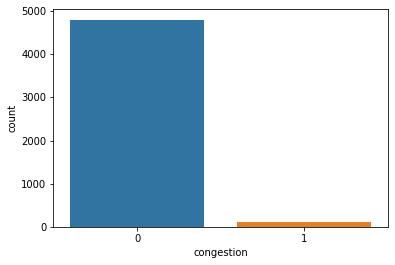

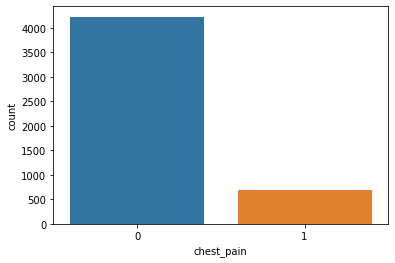

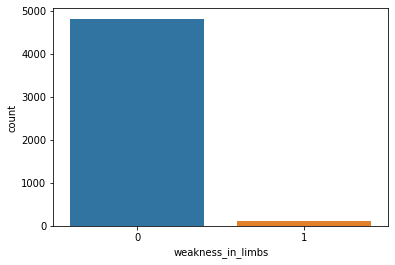

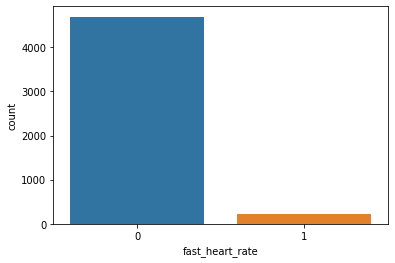

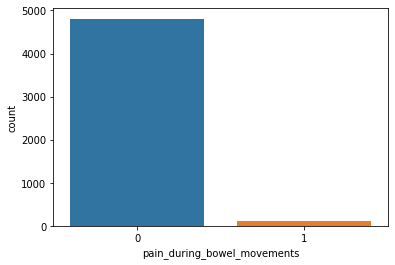

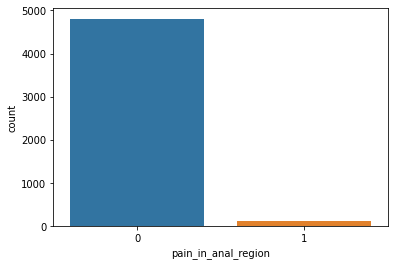

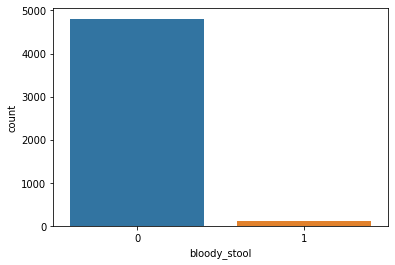

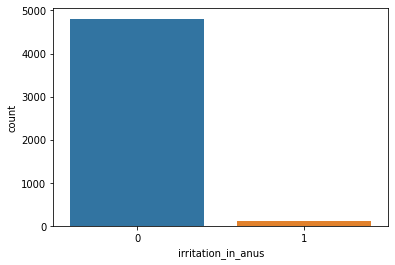

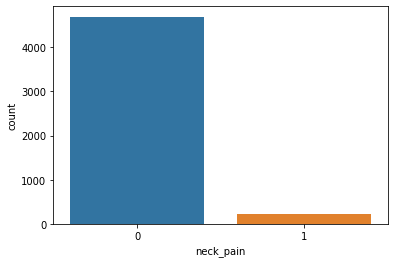

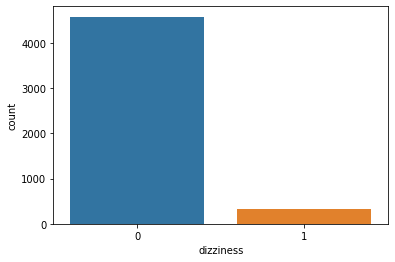

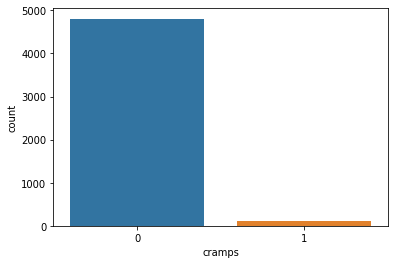

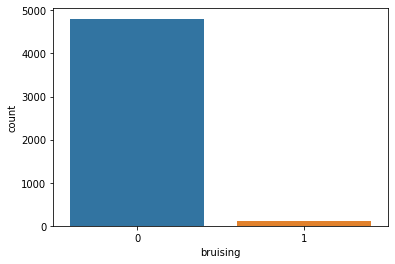

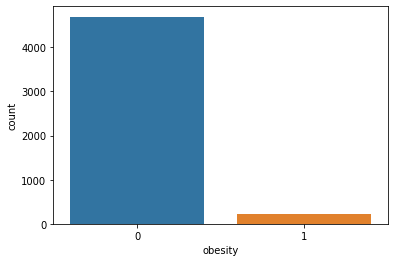

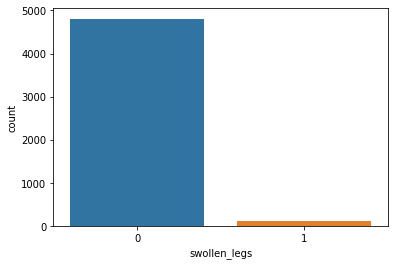

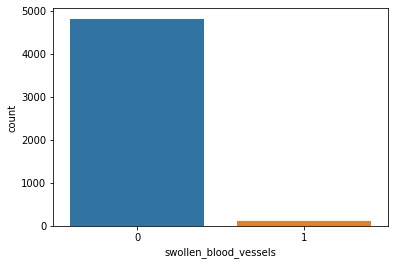

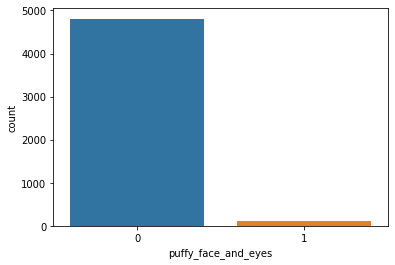

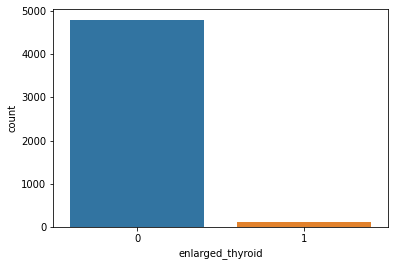

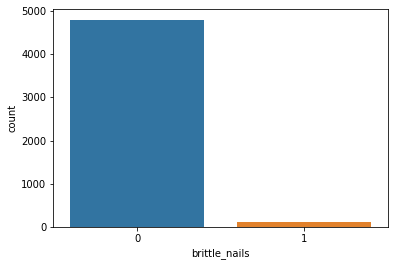

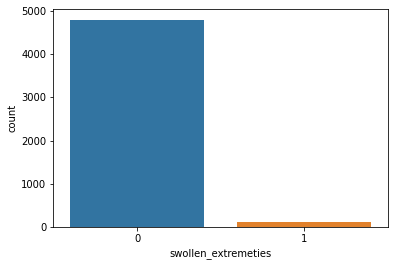

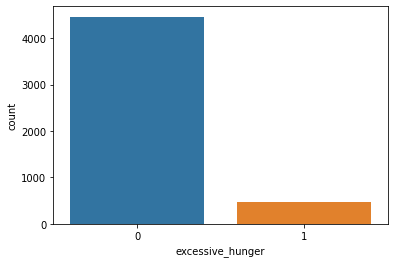

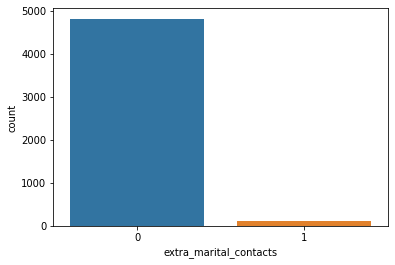

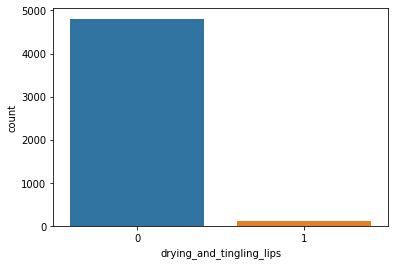

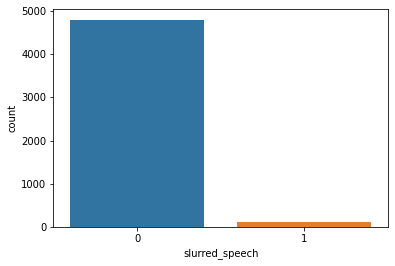

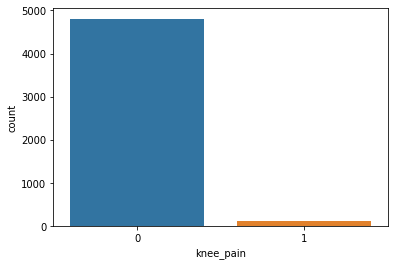

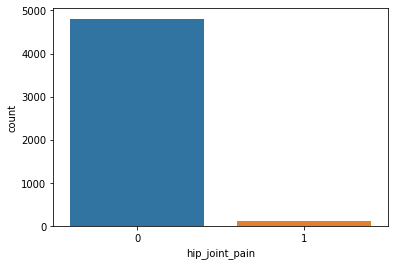

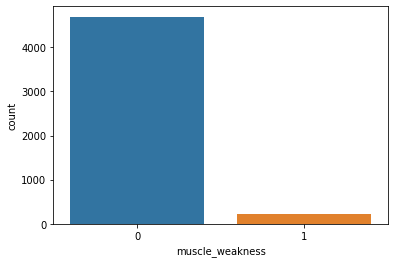

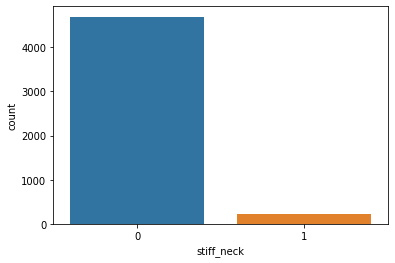

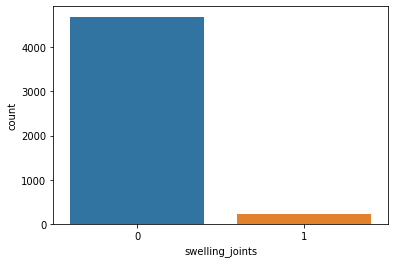

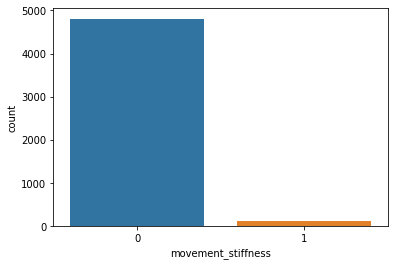

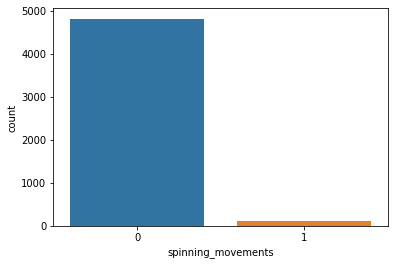

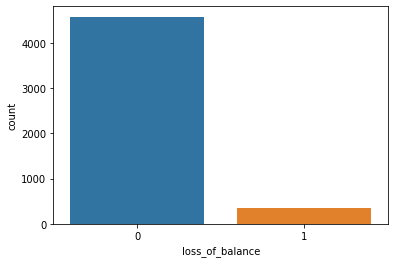

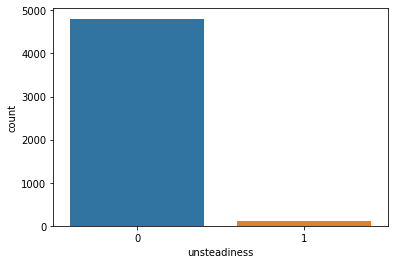

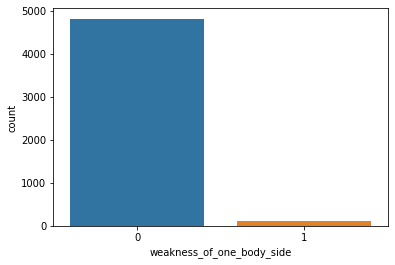

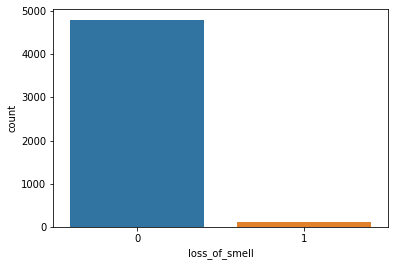

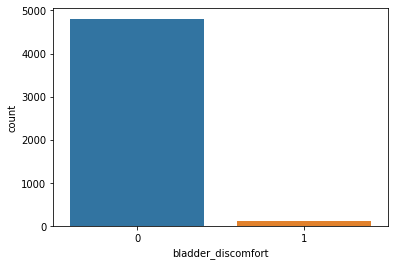

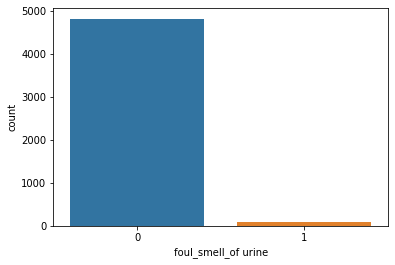

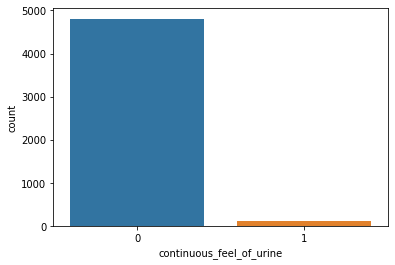

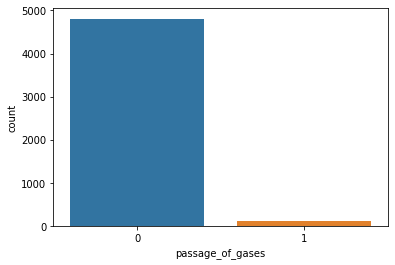

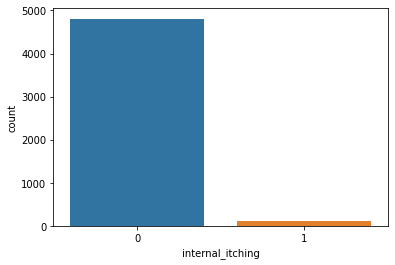

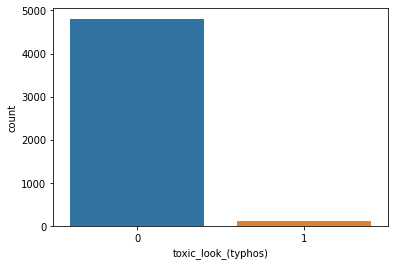

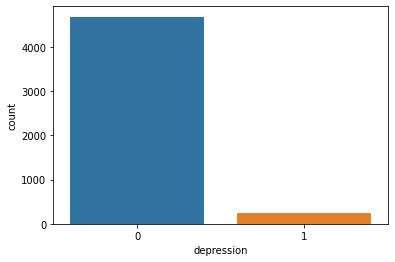

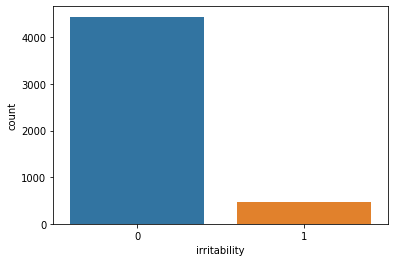

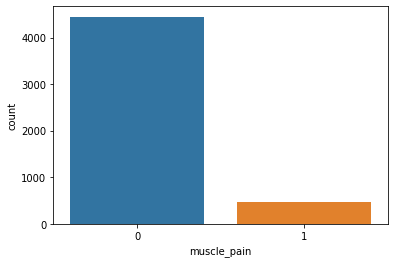

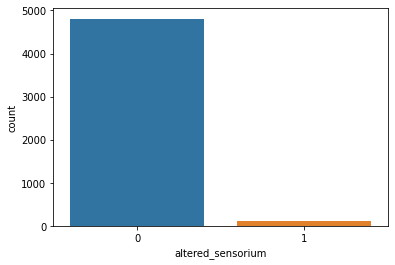

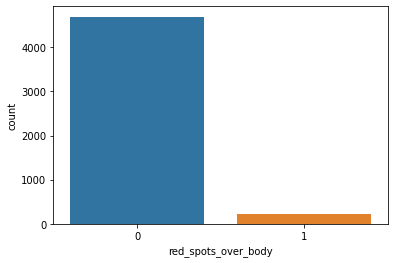

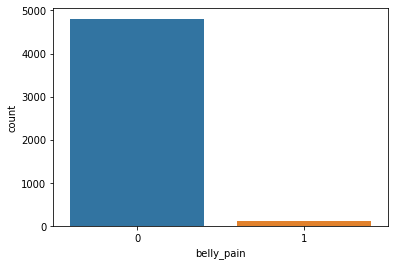

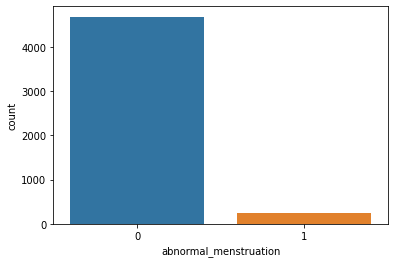

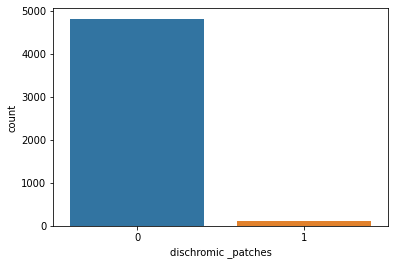

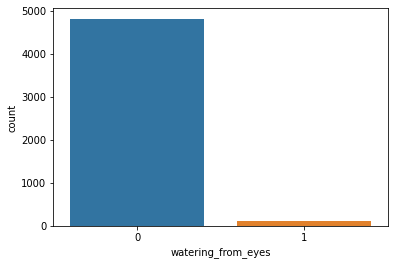

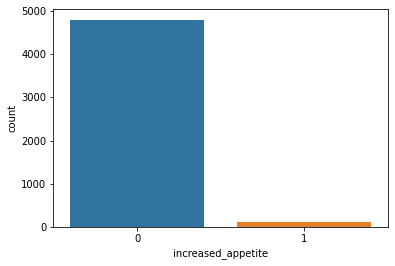

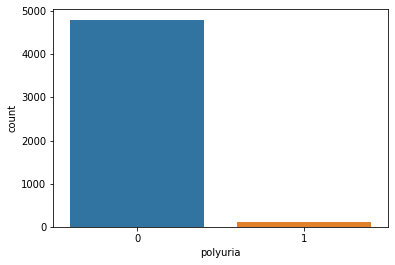

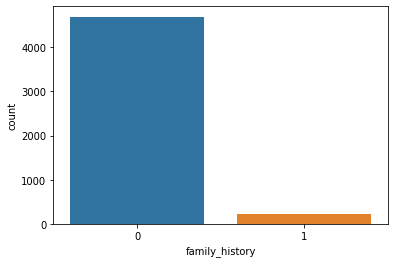

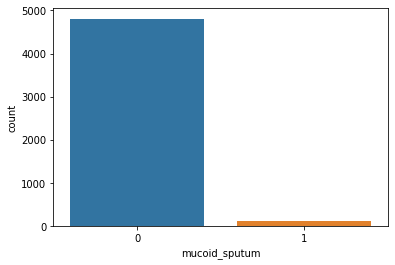

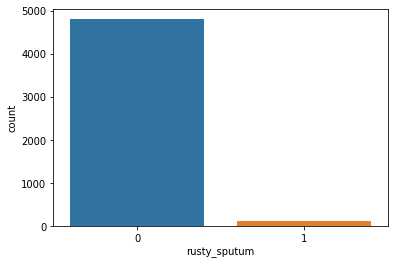

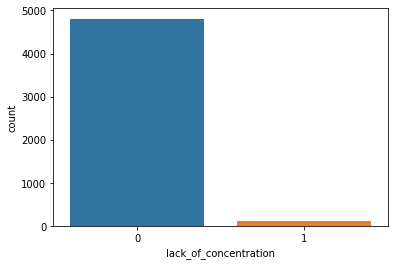

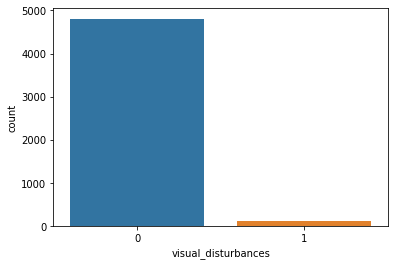

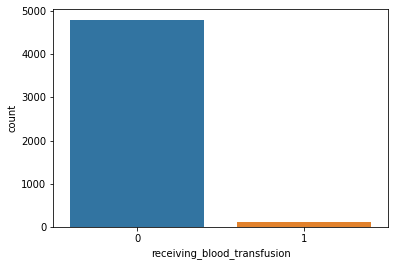

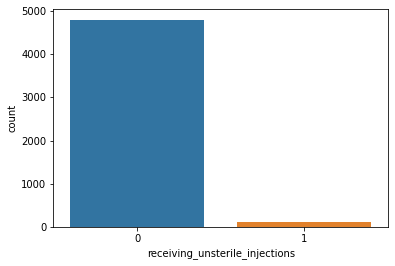

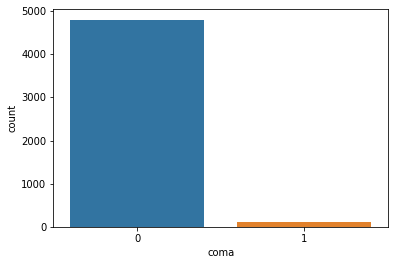

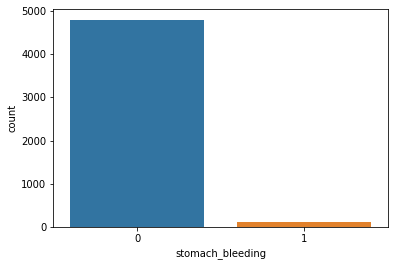

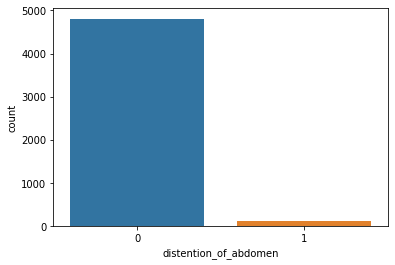

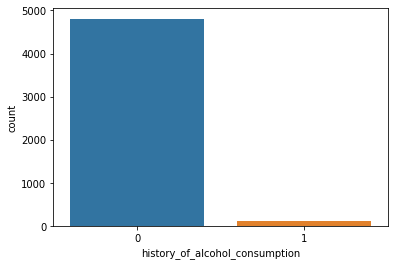

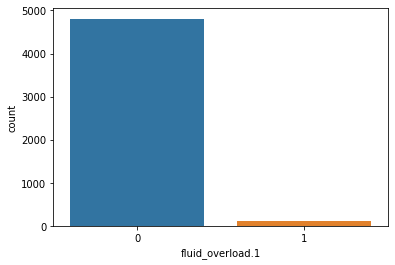

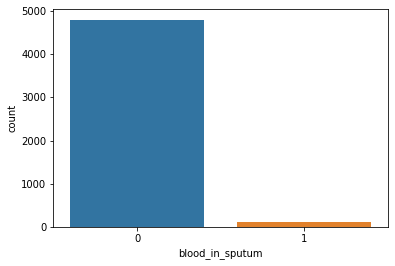

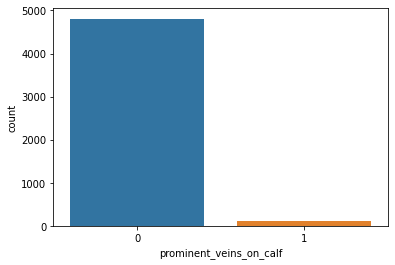

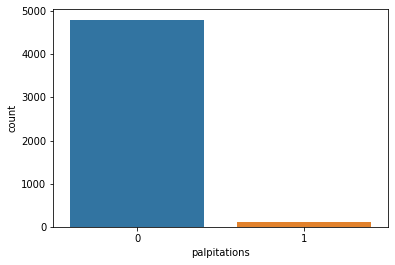

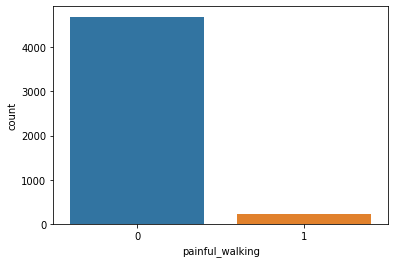

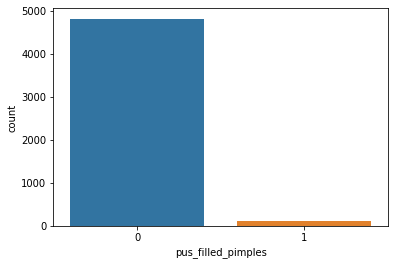

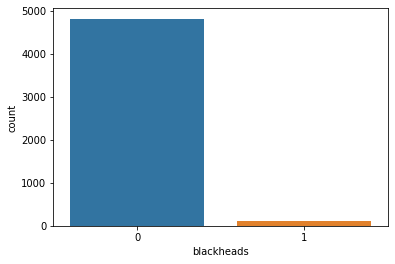

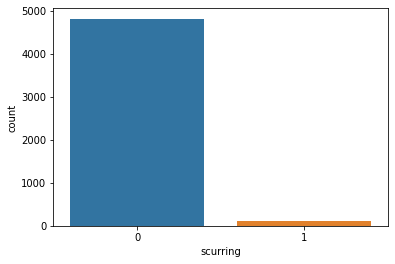

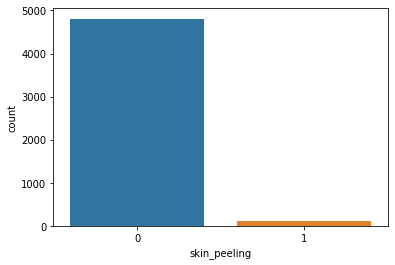

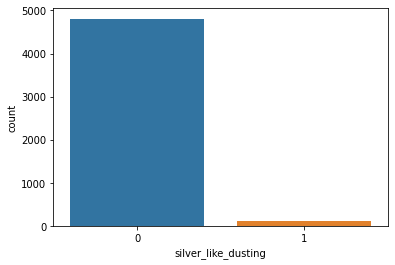

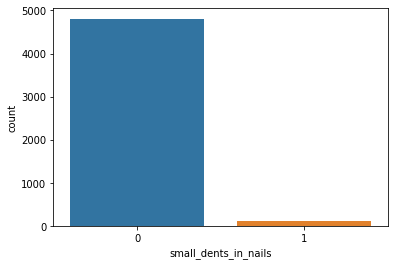

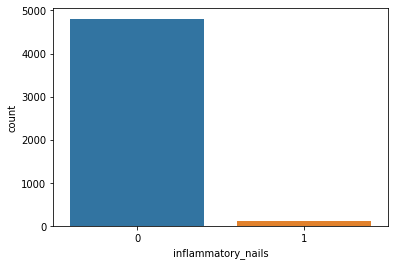

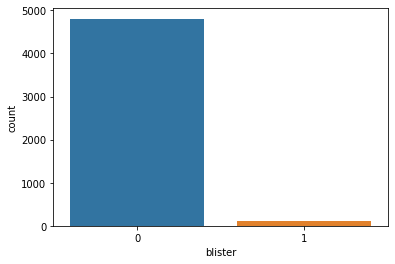

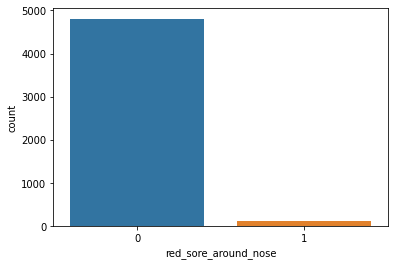

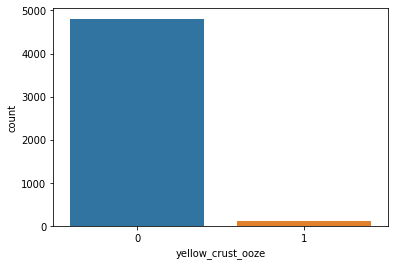

In [24]:
for col in train.columns:
    if col =='prognosis':
        continue
    sns.countplot(data = train , x = col)
    plt.show()

In [25]:
Y = train['prognosis']
X = train.drop('prognosis',axis =1)
y_test = test['prognosis']
X_test = test.drop('prognosis',axis = 1)

In [26]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size = 0.33,random_state = 42)

In [29]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10,max_features = 'sqrt')
rf = RandomForestClassifier(n_estimators = 10,bootstrap = True,max_depth = 10)

In [30]:
dt = dt.fit(X_train,Y_train)

In [31]:
dt.score(X_val,Y_val)

0.8152709359605911

In [32]:
rf = rf.fit(X_train,Y_train)
rf.score(X_val,Y_val)

0.9279556650246306

In [34]:
## Best results on random_forest_classifier

In [35]:
import pickle

In [37]:
pickle_out = open('modelH.pkl',"wb")
pickle.dump(rf,pickle_out)
pickle_out.close()